<a href="https://colab.research.google.com/github/learn-programmers/programmers_kdt_II/blob/main/(KDT)_%EC%88%AB%EC%9E%90%EC%9D%B4%EB%AF%B8%EC%A7%80_%EC%98%A4%ED%86%A0%EC%9D%B8%EC%BD%94%EB%8D%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 256
x_test = x_test.astype('float32') / 256

print(x_train.shape)

11490434/11490434 [==============================] - 1s 0us/step
(60000, 28, 28)


In [3]:
x_train = x_train.reshape(len(x_train), 28*28)
x_test = x_test.reshape(len(x_test), 28*28)

print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [4]:
input_layer = Input(shape=(784,))
encoded = Dense(64, activation='relu')(input_layer)
decoded = Dense(784, activation='sigmoid')(encoded)

In [5]:
autoencoder = Model(input_layer, decoded)

In [6]:
encoder = Model(input_layer, encoded)

In [7]:
input_layer_decoder = Input(shape=(64,))
decoder_layer = autoencoder.layers[-1](input_layer_decoder)
decoder = Model(input_layer_decoder,decoder_layer)

In [8]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 784)               50960     
                                                                 
Total params: 101,200
Trainable params: 101,200
Non-trainable params: 0
_________________________________________________________________


In [9]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train,x_train, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test,x_test))

Epoch 1/50
235/235 [==============================] - 2s 7ms/step - loss: 0.2446 - val_loss: 0.1631
Epoch 2/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1444 - val_loss: 0.1267
Epoch 3/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1182 - val_loss: 0.1086
Epoch 4/50
235/235 [==============================] - 2s 7ms/step - loss: 0.1042 - val_loss: 0.0979
Epoch 5/50
235/235 [==============================] - 1s 6ms/step - loss: 0.0953 - val_loss: 0.0908
Epoch 6/50
235/235 [==============================] - 1s 6ms/step - loss: 0.0891 - val_loss: 0.0858
Epoch 7/50
235/235 [==============================] - 1s 6ms/step - loss: 0.0849 - val_loss: 0.0824
Epoch 8/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0821 - val_loss: 0.0803
Epoch 9/50
235/235 [==============================] - 1s 6ms/step - loss: 0.0801 - val_loss: 0.0786
Epoch 10/50
235/235 [==============================] - 1s 6ms/step - loss: 0.0788 - val_loss: 0.0776

In [10]:
encoded_images = encoder.predict(x_test)
decoded_images = decoder.predict(encoded_images)

313/313 [==============================] - 2s 5ms/step


In [11]:
def visualize(data, size):
    n = 8
    plt.figure(figsize=(20,4))
    plt.gray()
    for i in range(n):
        ax = plt.subplot(2,n,i+1)
        plt.imshow(data[i].reshape(size,size))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

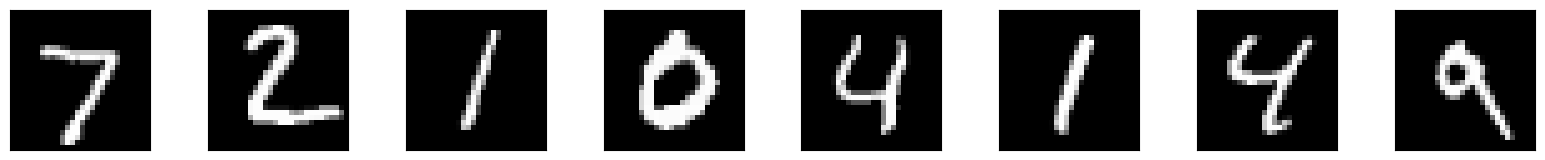

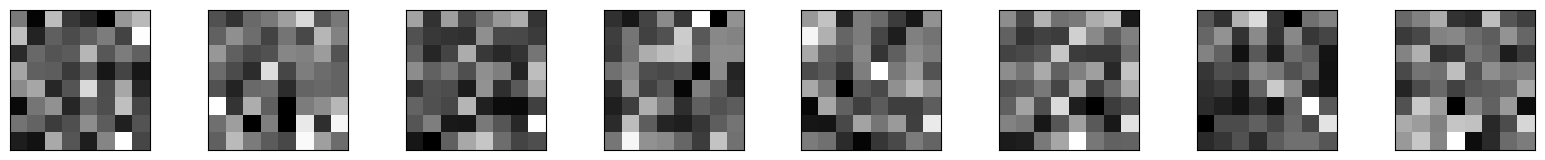

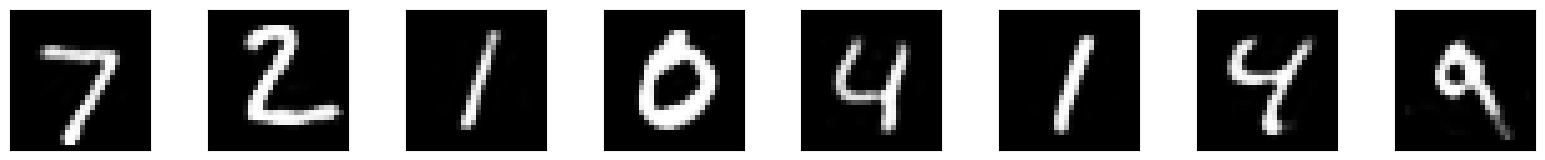

In [12]:
visualize(x_test, 28)
visualize(encoded_images, 8)
visualize(decoded_images, 28)